# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
df = pd.read_csv('../2_dataset/yelp.csv')

## Task 1

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [2]:
# show the first review

In [3]:
dfnew = pd.read_json('../2_dataset/yelp.json', lines = True)

In [4]:
dfnew.votes[0]['cool']
dfnew['cool'] = dfnew.apply(lambda x: x.votes['cool'], axis=1)
dfnew['useful'] = dfnew.apply(lambda x: x.votes['useful'], axis=1)
dfnew['funny'] = dfnew.apply(lambda x: x.votes['funny'], axis=1)
dfnew.drop(['votes'],axis=1,inplace = True)

In [5]:
dfnew.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
dfnew.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [7]:
# treat stars as a categorical variable and look for differences between groups

In [8]:
# correlation matrix
import matplotlib as plt
%matplotlib inline

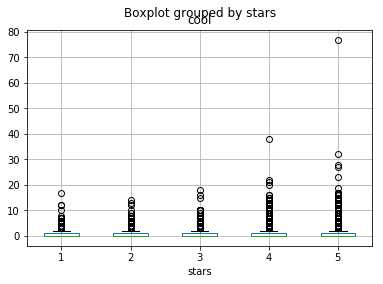

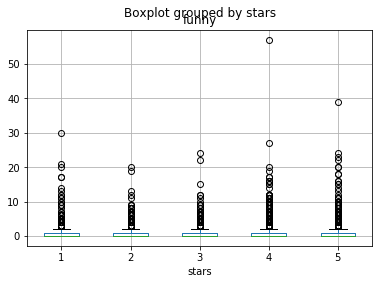

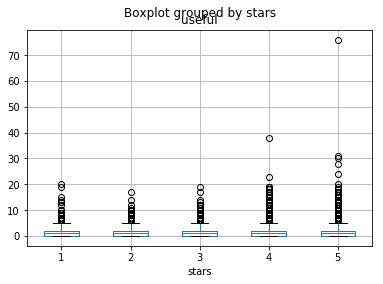

In [9]:
dfnew.boxplot(by='stars', column='cool')
dfnew.boxplot(by='stars', column='funny')
dfnew.boxplot(by='stars', column='useful')

## Task 3

Define cool/useful/funny as the features, and stars as the response.

In [10]:
feature_cols = ['useful','funny','cool']

In [11]:
X = dfnew[feature_cols]
Y = dfnew.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [12]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
linreg.coef_

array([-0.14745239, -0.13567449,  0.27435947])

The coefficients for cool and funny make intuitive sense to me. I would associate a cool vote on a review as an endorsement of a reader wanting to try that restaurant, buy that item, visit that place, etc. From the reviews that I looked at, the funny votes were often associated with a lower star rating and somebody writing a sarcastic review about how bad their service was.
What doesn't make intuitive sense to me is the negative coefficient for useful. I can see scenarios where people would vote negative reviews with low stars as useful in their decision making, but I think generally people view long, detailed, and positive reviews as the most useful. Maybe there is some multicollinearity going on here between cool and useful. There also seem to be some large outliers for useful ratings.

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [14]:
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split

train, test = train_test_split(dfnew, test_size=0.25)

In [15]:
lm = LinearRegression()
train_x = train[feature_cols]
train_y = train['stars']
lm.fit(train_x, train_y)
test_x = test[feature_cols]
true_y = test['stars']
pred_y = lm.predict(test_x)
rmse = np.sqrt(metrics.mean_squared_error(true_y, pred_y))
print(rmse)

1.18736036174


In [16]:
# define a function that accepts a list of features and returns testing RMSE
def root_mean_squared_error(feature_cols):
    train2, test2 = train_test_split(dfnew, test_size=0.25, random_state=123)
    lm = LinearRegression()
    train2_x = train2[feature_cols]
    train2_y = train2['stars']
    test2_x = test2[feature_cols]
    true2_y = test2['stars']
    
    lm.fit(train2_x, train2_y)
    pred2_y = lm.predict(test2_x)
    
    rmse2 = np.sqrt(metrics.mean_squared_error(true2_y, pred2_y))
    print('RMSE: ' , rmse2)

In [17]:
# calculate RMSE with all three features
root_mean_squared_error(['cool','useful','funny'])

RMSE:  1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [18]:
root_mean_squared_error(['cool','funny'])

RMSE:  1.1851949299


In [19]:
root_mean_squared_error(['cool','useful'])

RMSE:  1.18537944234


In [20]:
root_mean_squared_error(['useful','funny'])

RMSE:  1.20070113589


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [21]:
# new feature: review length (number of characters)
dfnew['review_length'] = dfnew.apply(lambda x: len(x.text), axis=1)
feature_cols.append('review_length')

In [22]:
# RMSE with review_length included
root_mean_squared_error(feature_cols)

RMSE:  1.16683462195


In [23]:
# new features: whether or not the review contains 'love' or 'hate'
# dfnew['love_hate'] = dfnew.apply(lambda x: x.text.contains('hate'|'love'))
# dfnew[dfnew['text'].str.contains("hate")].shape
dfnew['love_hate'] = dfnew.text.str.contains('hate|love')
dfnew['love_hate'] = dfnew.love_hate * 1

In [24]:
# add new features to the model and calculate RMSE
feature_cols.append('love_hate')

In [25]:
root_mean_squared_error(feature_cols)

RMSE:  1.15807255699


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [26]:
# split the data (outside of the function)
train, test = train_test_split(dfnew, test_size=0.25, random_state=123)
y_test = test['stars']


In [27]:
# create a NumPy array with the same shape as y_test
test['stars'].shape

(2500,)

In [28]:
# fill the array with the mean of y_test
y_pred = np.full((2500,),test['stars'].mean())

In [29]:
# calculate null RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)

RMSE:  1.20197810296


## Task 9 (Bonus)

Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [30]:
# import and instantiate KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
X = train[feature_cols]
y = train['stars']
X_test = test[feature_cols]
y_true = test['stars']

In [31]:
# classification models will automatically treat the response value (1/2/3/4/5) as unordered categories
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
y_pred = knn.predict(X_test)

In [33]:
score = float(sum(y_pred == y_true)) / len(y_true)
print('Accuracy score: ', score)

Accuracy score:  0.2712


My KNN accuracy score is pretty poor. My hypothesis is that a big problem with using KNN is that this data set has a lot of overlap and not enough differentiation between classes.

In [49]:
# Maybe other classification methods would be better?
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [35]:
import numpy as np

In [48]:
# tried to implement a Random Forest classification model to see if that was a better classifier than KNN
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
X = train[feature_cols]
y = train['stars']
X_test = test[feature_cols]
y_true = test['stars']

clf.fit(X,y)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

In [37]:
np.array(y_pred_prob)

array([[ 0.7       ,  0.        ,  0.        ,  0.1       ,  0.2       ],
       [ 0.2       ,  0.        ,  0.        ,  0.6       ,  0.2       ],
       [ 0.        ,  0.        ,  0.        ,  0.775     ,  0.225     ],
       ..., 
       [ 0.1       ,  0.        ,  0.1       ,  0.2       ,  0.6       ],
       [ 0.        ,  0.        ,  0.11357143,  0.68892857,  0.1975    ],
       [ 0.        ,  0.        ,  0.34246032,  0.35992063,  0.29761905]])

In [51]:
# Needed to create dummy columns for the classes
y_truenew = pd.get_dummies(y_true)
# y_truenew

In [50]:
# I need to go through each of the five class values
for i in range(0, y_pred_prob.shape[1]):
    auc = roc_auc_score(y_truenew[i+1], y_pred_prob[:,i])
    print(auc)

0.536296340222
0.528086579994
0.51697484611
0.513348781293
0.535236811541


In summary: still pretty poor.

## Task 10 (Bonus)

Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [40]:
# use linear regression to make continuous predictions


In [41]:
# round its predictions to the nearest integer

In [42]:
# calculate classification accuracy of the rounded predictions

## Task 1 (Bonus)

Interact with JSON

In [43]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary using using json.loads()

In [44]:
# convert the list of dictionaries to a DataFrame

In [45]:
# add DataFrame columns for cool, useful, and funny

In [46]:
# drop the votes column